In [67]:
# adaboost gradientboost clustering
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
url = 'data/heart_disease_ind_2015.csv'

df = pd.read_csv(url)

In [3]:
# setup baseline
df.HeartDiseaseorAttack.value_counts(normalize=True)

0.0    0.905814
1.0    0.094186
Name: HeartDiseaseorAttack, dtype: float64

In [19]:
df.HeartDiseaseorAttack.value_counts(normalize=False)

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [72]:
df.HeartDiseaseorAttack.value_counts()[1]

23893

In [81]:
df_non_heart = df[df.HeartDiseaseorAttack==0]
df_non_heart = df_non_heart.sample(int(df.HeartDiseaseorAttack.value_counts()[1]/4))
df_non_heart
df_heart = df[df.HeartDiseaseorAttack==1]
df_small = pd.concat([df_non_heart, df_heart])
df_small

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
237728,0.0,1.0,1.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,3.0,0.0,1.0,10.0,6.0,6.0
214818,0.0,1.0,1.0,0.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,5.0,8.0
2537,0.0,0.0,0.0,1.0,22.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
5052,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,2.0,0.0,0.0,8.0,6.0,8.0
158235,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,1.0,0.0,0.0,7.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253668,1.0,0.0,1.0,1.0,29.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
253670,1.0,1.0,1.0,1.0,25.0,0.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253671,1.0,1.0,1.0,1.0,23.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,4.0,0.0,5.0,0.0,1.0,8.0,3.0,2.0
253672,1.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,2.0,1.0


In [82]:
X = df_small.drop(columns='HeartDiseaseorAttack')
y = df_small['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [96]:
X_train.loc[122235]

HighBP                1.0
HighChol              1.0
CholCheck             1.0
BMI                  23.0
Smoker                1.0
Stroke                0.0
Diabetes              0.0
PhysActivity          1.0
Fruits                1.0
Veggies               0.0
HvyAlcoholConsump     0.0
AnyHealthcare         1.0
NoDocbcCost           0.0
GenHlth               4.0
MentHlth              0.0
PhysHlth              5.0
DiffWalk              1.0
Sex                   1.0
Age                  12.0
Education             5.0
Income                3.0
Name: 122235, dtype: float64

In [107]:
df['NoDocbcCost'].value_counts(normalize = True)
pd.DataFrame(

0.0    0.915823
1.0    0.084177
Name: NoDocbcCost, dtype: float64

In [117]:
df2 = pd.DataFrame([[1, 2, 3]],
                   columns=['a', 'b', 'c'])
df2

,a,b,c
0,1,2,3


In [114]:
x = pd.DataFrame(np.array([[1,2,3,4,5,6,7,8,8,10,11,12,13,14,15,16,17,18,19,20,21]]), 
                 columns = ['HighBP', 'HighChol', 'CholCheck', 'BMI',
        'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
        'Income'])

In [83]:
pipe_ada = Pipeline([
    ('ss', StandardScaler()),
    ('abc', AdaBoostClassifier(learning_rate=0.5, n_estimators=50, random_state=1))
])

pipe_grad = Pipeline([
    ('ss', StandardScaler()),
    ('gbc', GradientBoostingClassifier(random_state=1))
])

pipe_km = Pipeline([
    ('ss', StandardScaler()),
    ('km', KMeans(random_state=1))
])

pipe_dbs = Pipeline([
    ('ss', StandardScaler()),
    ('dbs', DBSCAN())
])

pipe_xgb = Pipeline([
    ('ss', StandardScaler()),
    ('xgb', xgb.XGBClassifier())
])

In [84]:
pipe_ada.fit(X_train, y_train)

pipe_ada.score(X_train, y_train), pipe_ada.score(X_test, y_test)

(0.8593240769677217, 0.854693986875586)

In [85]:
pipe_grad.fit(X_train, y_train)

pipe_grad.score(X_train, y_train), pipe_grad.score(X_test, y_test)

(0.8640564310906736, 0.8579081291013794)

In [86]:
pipe_xgb.fit(X_train, y_train)

pipe_xgb.score(X_train, y_train), pipe_xgb.score(X_test, y_test)

(0.89945979731238, 0.8528190705772064)

## GridSearching for hyperparams - DON'T run these!

This excludes the clustering models below.

In [12]:
#ada_params = {
#    'n_estimators': [25, 50, 100, 250],
#    'learning_rate': [0.5, 1.0, 1.5, 2.0, 2.5],
#}

#gs_ada = GridSearchCV(AdaBoostClassifier(), param_grid=ada_params, cv=5, verbose=1)

# Fit the GridSearchCV object to the data
#gs_ada.fit(pipe_ada['ss'].fit_transform(X_train), y_train)



In [60]:
#gs_ada.best_params_

{'learning_rate': 0.5, 'n_estimators': 25}

In [65]:
#gs_ada.best_score_

0.9074529591085883

In [13]:
# grad_params = {
#     'n_estimators': [50, 100, 250, 500],
#     'min_samples_split': [2, 5, 10],
# }

# gs_grad = GridSearchCV(GradientBoostingClassifier(), param_grid=grad_params, cv=5, verbose=1)

# # Fit the GridSearchCV object to the data
# gs_grad.fit(pipe_grad['ss'].fit_transform(X_train), y_train)


In [66]:
#gs_grad.best_params_

{'min_samples_split': 2, 'n_estimators': 50}

In [67]:
#gs_grad.best_score_

0.9081520025228634

In [70]:
# xgb_params = {
#     'n_estimators': [25, 50, 100, 250],
#     'learning_rate': [0.5, 1.0, 1.5, 2.0],
# }

# gs_xgb = GridSearchCV(xgb.XGBClassifier(), param_grid=xgb_params, cv=2, verbose=1)

# # Fit the GridSearchCV object to the data
# gs_xgb.fit(pipe_xgb['ss'].fit_transform(X_train), y_train)


Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.5, 1.0, 1.5, 2.0],
                         'n_estimators': [25, 50, 100, 250]},
             verbose=1)

In [71]:
#gs_xgb.best_params_

{'learning_rate': 0.5, 'n_estimators': 25}

In [14]:
#gs_xgb.best_score_

## Don't run these lol

In [22]:
pipe_km.fit(df)

silhouette_score(pipe_km['ss'].fit_transform(df), pipe_km['km'].labels_), pipe_km['km'].inertia_

(0.08162067175369862, 4688375.300274653)

now evaluating k=2
now evaluating k=3
now evaluating k=4
now evaluating k=5
now evaluating k=6
now evaluating k=7
now evaluating k=8
now evaluating k=9
now evaluating k=10
now evaluating k=11
now evaluating k=12
now evaluating k=13
now evaluating k=14
now evaluating k=15


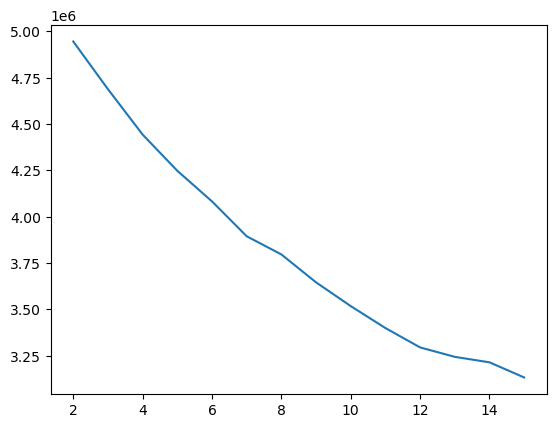

In [27]:
scores = []

for k in range(2, 16):
    print(f'now evaluating k={k}')
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(pipe_km['ss'].fit_transform(df))
    scores.append([k, kmeans.inertia_])

inertia_df = pd.DataFrame(scores, columns=['n_clusters', 'inertia'])
plt.plot(inertia_df['n_clusters'], inertia_df['inertia'])

In [23]:
pipe_dbs.fit(df)

silhouette_score(pipe_dbs['ss'].fit_transform(df), pipe_dbs['dbs'].labels_)

-0.34113081792698824

## Confusion matrices

Initial = Ada minimizes false negatives which is probably the best result for which to optimize.

True positives:  5643
False positives:  768
True negatives:  725
False negatives:  331
Accuracy:  0.8528190705772064
True pos rate/recall/sensitivity:  0.9445932373619016
False pos rate:  0.5144005358338914
True neg rate/specificity:  0.4855994641661085
Precision:  0.8802058961160505
              precision    recall  f1-score   support

      No HDA       0.69      0.49      0.57      1493
     Yes HDA       0.88      0.94      0.91      5974

    accuracy                           0.85      7467
   macro avg       0.78      0.72      0.74      7467
weighted avg       0.84      0.85      0.84      7467



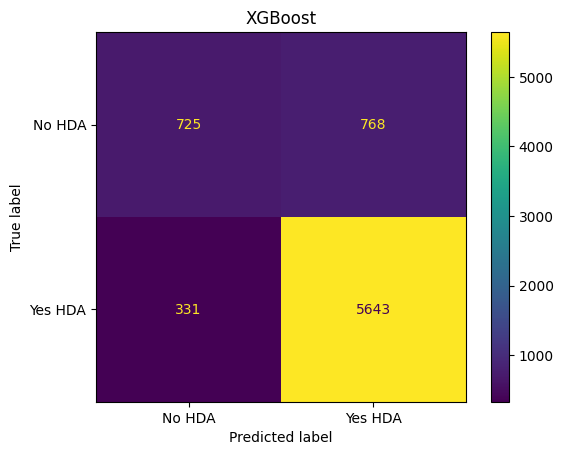

In [87]:
ConfusionMatrixDisplay.from_estimator(pipe_xgb.fit(X_train, y_train), X_test, y_test, display_labels=['No HDA', 'Yes HDA'])
plt.title('XGBoost');
predict_xgb = pipe_xgb.predict(X_test)
tp_xgb = sum((y_test == 1) & (predict_xgb == 1))
fp_xgb = sum((y_test == 0) & (predict_xgb == 1))
tn_xgb = sum((y_test == 0) & (predict_xgb == 0))
fn_xgb = sum((y_test == 1) & (predict_xgb == 0))
print('True positives: ', tp_xgb)
print('False positives: ', fp_xgb)
print('True negatives: ', tn_xgb)
print('False negatives: ', fn_xgb)

print('Accuracy: ', (tp_xgb + tn_xgb) / (tp_xgb + tn_xgb + fp_xgb + fn_xgb))
print('True pos rate/recall/sensitivity: ', tp_xgb / (tp_xgb + fn_xgb))
print('False pos rate: ', fp_xgb / (tn_xgb + fp_xgb))
print('True neg rate/specificity: ', tn_xgb / (tn_xgb + fp_xgb))
print('Precision: ', tp_xgb / (tp_xgb + fp_xgb))

from sklearn.metrics import classification_report

print(classification_report(y_test, predict_xgb, target_names=['No HDA', 'Yes HDA']))

In [90]:
# ConfusionMatrixDisplay.from_estimator(pipe_xgb.fit(X_train, y_train), X_test, y_test, display_labels=['No HDA', 'Yes HDA'])
# plt.title('XGBoost');
predict_xgb = pipe_xgb.predict(df.drop(columns = ['HeartDiseaseorAttack']))
                            
y_test = df['HeartDiseaseorAttack']         
tp_xgb = sum((y_test == 1) & (predict_xgb == 1))
fp_xgb = sum((y_test == 0) & (predict_xgb == 1))
tn_xgb = sum((y_test == 0) & (predict_xgb == 0))
fn_xgb = sum((y_test == 1) & (predict_xgb == 0))
print('True positives: ', tp_xgb)
print('False positives: ', fp_xgb)
print('True negatives: ', tn_xgb)
print('False negatives: ', fn_xgb)

print('Accuracy: ', (tp_xgb + tn_xgb) / (tp_xgb + tn_xgb + fp_xgb + fn_xgb))
print('True pos rate/recall/sensitivity: ', tp_xgb / (tp_xgb + fn_xgb))
print('False pos rate: ', fp_xgb / (tn_xgb + fp_xgb))
print('True neg rate/specificity: ', tn_xgb / (tn_xgb + fp_xgb))
print('Precision: ', tp_xgb / (tp_xgb + fp_xgb))

from sklearn.metrics import classification_report

print(classification_report(y_test, predict_xgb, target_names=['No HDA', 'Yes HDA']))

True positives:  23055
False positives:  119045
True negatives:  110742
False negatives:  838
Accuracy:  0.5274243140964995
True pos rate/recall/sensitivity:  0.9649269660570041
False pos rate:  0.5180667313642634
True neg rate/specificity:  0.4819332686357366
Precision:  0.16224489795918368
              precision    recall  f1-score   support

      No HDA       0.99      0.48      0.65    229787
     Yes HDA       0.16      0.96      0.28     23893

    accuracy                           0.53    253680
   macro avg       0.58      0.72      0.46    253680
weighted avg       0.91      0.53      0.61    253680



In [91]:
23055/(23055+838)

0.9649269660570041

True positives:  5719
False positives:  830
True negatives:  663
False negatives:  255


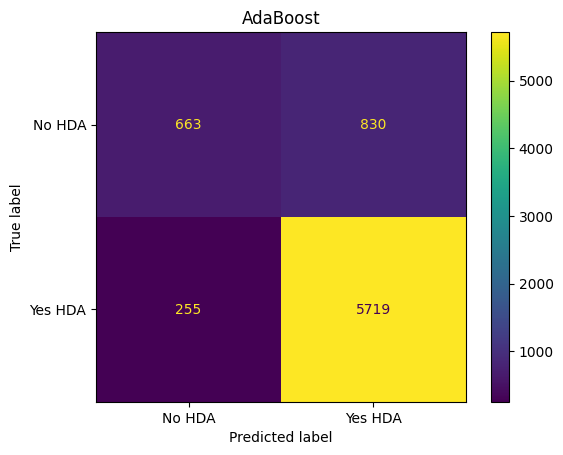

In [88]:
ConfusionMatrixDisplay.from_estimator(pipe_ada.fit(X_train, y_train), X_test, y_test, display_labels=['No HDA', 'Yes HDA'])
plt.title('AdaBoost');

predict_ada = pipe_ada.predict(X_test)
print('True positives: ', sum((y_test == 1) & (predict_ada == 1)))
print('False positives: ', sum((y_test == 0) & (predict_ada == 1)))
print('True negatives: ', sum((y_test == 0) & (predict_ada == 0)))
print('False negatives: ', sum((y_test == 1) & (predict_ada == 0)))

True positives:  4848
False positives:  1599
True negatives:  4374
False negatives:  1126


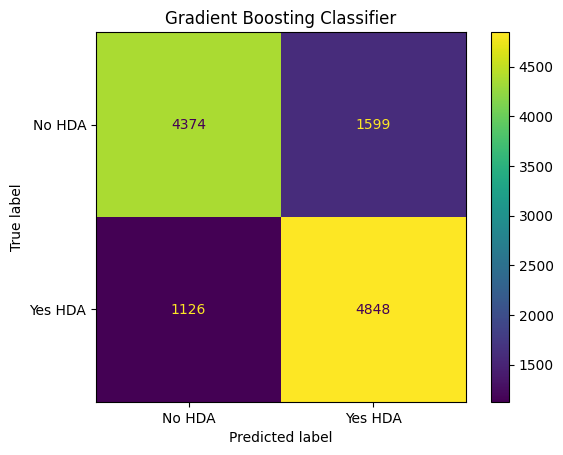

In [36]:
ConfusionMatrixDisplay.from_estimator(pipe_grad.fit(X_train, y_train), X_test, y_test, display_labels=['No HDA', 'Yes HDA'])
plt.title('Gradient Boosting Classifier');

predict_grad = pipe_grad.predict(X_test)
print('True positives: ', sum((y_test == 1) & (predict_grad == 1)))
print('False positives: ', sum((y_test == 0) & (predict_grad == 1)))
print('True negatives: ', sum((y_test == 0) & (predict_grad == 0)))
print('False negatives: ', sum((y_test == 1) & (predict_grad == 0)))

|  | XGBoost | AdaBoost | Gradient Boost |
| --- | ---: | ---: | ---: |
| True positives | 727 | 877 | 687 |
| False positives | 651 | 780 | 549 |
| True negatives | 56796 | 56667 | 56898 |
| False negatives | 5246 | 5096 | 5286 |

In [38]:
print(f'{"XGBoost" : ^50}\n\n', classification_report(y_test, predict_xgb, target_names=['No HDA', 'Yes HDA']))
print(f'{"AdaBoost" : ^50}\n\n', classification_report(y_test, predict_ada, target_names=['No HDA', 'Yes HDA']))
print(f'{"Gradient Boost" : ^50}\n\n', classification_report(y_test, predict_grad, target_names=['No HDA', 'Yes HDA']))

                     XGBoost                      

               precision    recall  f1-score   support

      No HDA       0.78      0.73      0.76      5973
     Yes HDA       0.75      0.80      0.77      5974

    accuracy                           0.76     11947
   macro avg       0.77      0.76      0.76     11947
weighted avg       0.77      0.76      0.76     11947

                     AdaBoost                     

               precision    recall  f1-score   support

      No HDA       0.77      0.75      0.76      5973
     Yes HDA       0.76      0.78      0.77      5974

    accuracy                           0.77     11947
   macro avg       0.77      0.77      0.77     11947
weighted avg       0.77      0.77      0.77     11947

                  Gradient Boost                  

               precision    recall  f1-score   support

      No HDA       0.80      0.73      0.76      5973
     Yes HDA       0.75      0.81      0.78      5974

    accuracy           

## Neural Network models

In [39]:
X = df_small.drop(columns='HeartDiseaseorAttack')
y = df_small['HeartDiseaseorAttack'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [41]:
print(df_small.dtypes)
df_small.shape

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


(47786, 22)

In [42]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [43]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(21, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))

model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(.25))

model.add(Dense(3, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(.25))

model.add(Dense(1, activation='sigmoid'))

2022-09-22 10:48:57.754890: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-22 10:48:57.757083: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [48]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [62]:
type(np.array(y_test)), type(X_test)

(numpy.ndarray, numpy.ndarray)

In [65]:
history = model.fit(
    X_train, np.array(y_train),
    validation_data=(X_test, np.array(y_test)),
    epochs=20,
    verbose=1
)

Train on 35839 samples, validate on 11947 samples
Epoch 1/20
35839/35839 [==============================] - 2s 56us/sample - loss: 0.5287 - accuracy: 0.7557 - val_loss: 0.4915 - val_accuracy: 0.7702
Epoch 2/20
35839/35839 [==============================] - 2s 59us/sample - loss: 0.5260 - accuracy: 0.7566 - val_loss: 0.4921 - val_accuracy: 0.7708
Epoch 3/20
35839/35839 [==============================] - 2s 60us/sample - loss: 0.5234 - accuracy: 0.7572 - val_loss: 0.4910 - val_accuracy: 0.7717
Epoch 4/20
35839/35839 [==============================] - 2s 59us/sample - loss: 0.5238 - accuracy: 0.7579 - val_loss: 0.4913 - val_accuracy: 0.7722
Epoch 5/20
35839/35839 [==============================] - 2s 61us/sample - loss: 0.5227 - accuracy: 0.7579 - val_loss: 0.4918 - val_accuracy: 0.7712
Epoch 6/20
35839/35839 [==============================] - 2s 59us/sample - loss: 0.5229 - accuracy: 0.7572 - val_loss: 0.4916 - val_accuracy: 0.7722
Epoch 7/20
35839/35839 [==============================] 

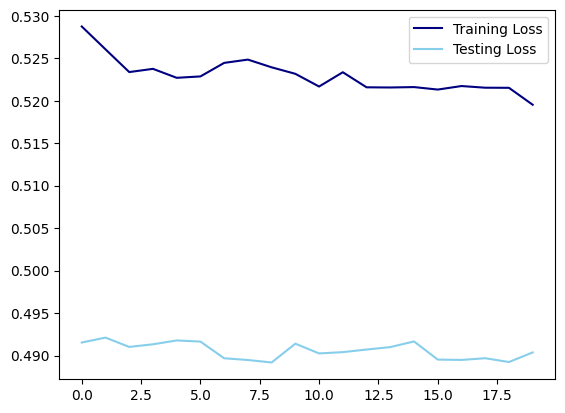

In [66]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.plot(train_loss, label='Training Loss', color='navy')
plt.plot(test_loss, label='Testing Loss', color='skyblue')
plt.legend();

In [92]:
with open('models/grad_minority_focus.pkl', 'wb') as pickle_out:
    pickle.dump(pipe_grad, pickle_out)

In [93]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
pipe_grad.predict_proba